In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('reduced.csv')
df = df.drop(['DIABETES','PREVAP','PREVCHD','PREVMI','PREVSTRK','PREVHYP'], axis=1)
df.head()

,SEX,AGE,SYSBP,DIABP,BPMEDS,CIGPDAY,EDUC,TOTCHOL,BMI,GLUCOSE,HEARTRTE,ANGINA,HOSPMI,MI_FCHD,ANYCHD,STROKE,CVD,HYPERTEN
0,1,39,106.0,70.0,0.0,0.0,4.0,195.0,26.97,77.0,80.0,0,1,1,1,0,1,0
1,2,46,121.0,81.0,0.0,0.0,2.0,250.0,28.73,76.0,95.0,0,0,0,0,0,0,0
2,2,52,105.0,69.5,0.0,0.0,2.0,260.0,29.43,86.0,80.0,0,0,0,0,0,0,0
3,2,58,108.0,66.0,0.0,0.0,2.0,237.0,28.50,71.0,80.0,0,0,0,0,0,0,0
4,1,48,127.5,80.0,0.0,20.0,1.0,245.0,25.34,70.0,75.0,0,0,0,0,0,0,0


In [4]:
target = df[["ANGINA"]]

In [5]:
data = df.drop(["ANGINA"], axis=1)
feature_names = data.columns
data.head()

,SEX,AGE,SYSBP,DIABP,BPMEDS,CIGPDAY,EDUC,TOTCHOL,BMI,GLUCOSE,HEARTRTE,HOSPMI,MI_FCHD,ANYCHD,STROKE,CVD,HYPERTEN
0,1,39,106.0,70.0,0.0,0.0,4.0,195.0,26.97,77.0,80.0,1,1,1,0,1,0
1,2,46,121.0,81.0,0.0,0.0,2.0,250.0,28.73,76.0,95.0,0,0,0,0,0,0
2,2,52,105.0,69.5,0.0,0.0,2.0,260.0,29.43,86.0,80.0,0,0,0,0,0,0
3,2,58,108.0,66.0,0.0,0.0,2.0,237.0,28.50,71.0,80.0,0,0,0,0,0,0
4,1,48,127.5,80.0,0.0,20.0,1.0,245.0,25.34,70.0,75.0,0,0,0,0,0,0


In [6]:
print(data.shape, target.shape)

(9310, 17) (9310, 1)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [8]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [9]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

network architecture

In [10]:
from keras.models import Sequential
from keras.layers import Dense

In [11]:
# clear session a couple times and restart kernel if accuracy gets stuck
from keras import backend
backend.clear_session()
backend.clear_session()
backend.clear_session()
backend.clear_session()
backend.clear_session()

In [12]:
# Create model and add layers
# network architecture: [17, 100, 75, 50, 25, 15, 2]
model = Sequential()
model.add(Dense(units=15, activation='relu', input_dim=17))
model.add(Dense(units=12, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# accuracy before training
# make sure this accuracy is low
model_loss, model_accuracy = model.evaluate(
    X_test, y_test_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.6581973398673985, Accuracy: 0.7585910650872693


In [15]:
history = model.fit(
    X_train,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

Epoch 1/1000
 - 1s - loss: 0.4671 - acc: 0.8298
Epoch 2/1000
 - 0s - loss: 0.4514 - acc: 0.8344
Epoch 3/1000
 - 0s - loss: 0.4385 - acc: 0.8359
Epoch 4/1000
 - 0s - loss: 0.4249 - acc: 0.8360
Epoch 5/1000
 - 0s - loss: 0.4007 - acc: 0.8362
Epoch 6/1000
 - 0s - loss: 0.3645 - acc: 0.8359
Epoch 7/1000
 - 0s - loss: 0.3332 - acc: 0.8374
Epoch 8/1000
 - 0s - loss: 0.2952 - acc: 0.8412
Epoch 9/1000
 - 0s - loss: 0.2411 - acc: 0.8608
Epoch 10/1000
 - 0s - loss: 0.2187 - acc: 0.8742
Epoch 11/1000
 - 0s - loss: 0.1970 - acc: 0.8856
Epoch 12/1000
 - 0s - loss: 0.1925 - acc: 0.8884
Epoch 13/1000
 - 0s - loss: 0.1905 - acc: 0.8897
Epoch 14/1000
 - 0s - loss: 0.1864 - acc: 0.8909
Epoch 15/1000
 - 0s - loss: 0.1897 - acc: 0.8900
Epoch 16/1000
 - 0s - loss: 0.1852 - acc: 0.8906
Epoch 17/1000
 - 0s - loss: 0.1988 - acc: 0.8850
Epoch 18/1000
 - 0s - loss: 0.1857 - acc: 0.8903
Epoch 19/1000
 - 0s - loss: 0.1864 - acc: 0.8893
Epoch 20/1000
 - 0s - loss: 0.1932 - acc: 0.8874
Epoch 21/1000
 - 0s - loss: 0

 - 0s - loss: 0.1555 - acc: 0.9066
Epoch 168/1000
 - 0s - loss: 0.1555 - acc: 0.9063
Epoch 169/1000
 - 0s - loss: 0.1590 - acc: 0.9065
Epoch 170/1000
 - 0s - loss: 0.1562 - acc: 0.9076
Epoch 171/1000
 - 1s - loss: 0.1635 - acc: 0.9040
Epoch 172/1000
 - 0s - loss: 0.1562 - acc: 0.9050
Epoch 173/1000
 - 0s - loss: 0.1542 - acc: 0.9101
Epoch 174/1000
 - 0s - loss: 0.1547 - acc: 0.9063
Epoch 175/1000
 - 0s - loss: 0.1544 - acc: 0.9069
Epoch 176/1000
 - 0s - loss: 0.1577 - acc: 0.9063
Epoch 177/1000
 - 0s - loss: 0.1632 - acc: 0.9033
Epoch 178/1000
 - 0s - loss: 0.1555 - acc: 0.9101
Epoch 179/1000
 - 0s - loss: 0.1565 - acc: 0.9089
Epoch 180/1000
 - 0s - loss: 0.1545 - acc: 0.9099
Epoch 181/1000
 - 0s - loss: 0.1543 - acc: 0.9088
Epoch 182/1000
 - 0s - loss: 0.1581 - acc: 0.9046
Epoch 183/1000
 - 0s - loss: 0.1740 - acc: 0.9039
Epoch 184/1000
 - 0s - loss: 0.1565 - acc: 0.9052
Epoch 185/1000
 - 0s - loss: 0.1592 - acc: 0.9052
Epoch 186/1000
 - 0s - loss: 0.1554 - acc: 0.9073
Epoch 187/1000


 - 0s - loss: 0.1533 - acc: 0.9145
Epoch 332/1000
 - 0s - loss: 0.1528 - acc: 0.9111
Epoch 333/1000
 - 0s - loss: 0.1530 - acc: 0.9125
Epoch 334/1000
 - 0s - loss: 0.1541 - acc: 0.9092
Epoch 335/1000
 - 0s - loss: 0.1513 - acc: 0.9133
Epoch 336/1000
 - 0s - loss: 0.1553 - acc: 0.9101
Epoch 337/1000
 - 0s - loss: 0.1640 - acc: 0.9030
Epoch 338/1000
 - 0s - loss: 0.1688 - acc: 0.9050
Epoch 339/1000
 - 0s - loss: 0.1546 - acc: 0.9096
Epoch 340/1000
 - 0s - loss: 0.1528 - acc: 0.9135
Epoch 341/1000
 - 0s - loss: 0.1522 - acc: 0.9118
Epoch 342/1000
 - 0s - loss: 0.1529 - acc: 0.9116
Epoch 343/1000
 - 0s - loss: 0.1517 - acc: 0.9146
Epoch 344/1000
 - 0s - loss: 0.1521 - acc: 0.9138
Epoch 345/1000
 - 0s - loss: 0.1521 - acc: 0.9126
Epoch 346/1000
 - 0s - loss: 0.1518 - acc: 0.9139
Epoch 347/1000
 - 0s - loss: 0.1513 - acc: 0.9144
Epoch 348/1000
 - 0s - loss: 0.1521 - acc: 0.9144
Epoch 349/1000
 - 0s - loss: 0.1527 - acc: 0.9116
Epoch 350/1000
 - 0s - loss: 0.1545 - acc: 0.9088
Epoch 351/1000


 - 0s - loss: 0.1529 - acc: 0.9166
Epoch 496/1000
 - 0s - loss: 0.1613 - acc: 0.9108
Epoch 497/1000
 - 0s - loss: 0.1512 - acc: 0.9159
Epoch 498/1000
 - 0s - loss: 0.1505 - acc: 0.9164
Epoch 499/1000
 - 0s - loss: 0.1522 - acc: 0.9139
Epoch 500/1000
 - 0s - loss: 0.1532 - acc: 0.9132
Epoch 501/1000
 - 0s - loss: 0.1518 - acc: 0.9201
Epoch 502/1000
 - 0s - loss: 0.1502 - acc: 0.9174
Epoch 503/1000
 - 0s - loss: 0.1516 - acc: 0.9125
Epoch 504/1000
 - 0s - loss: 0.1519 - acc: 0.9156
Epoch 505/1000
 - 0s - loss: 0.1510 - acc: 0.9135
Epoch 506/1000
 - 0s - loss: 0.1528 - acc: 0.9144
Epoch 507/1000
 - 0s - loss: 0.1504 - acc: 0.9166
Epoch 508/1000
 - 0s - loss: 0.1507 - acc: 0.9175
Epoch 509/1000
 - 0s - loss: 0.1517 - acc: 0.9165
Epoch 510/1000
 - 0s - loss: 0.1556 - acc: 0.9085
Epoch 511/1000
 - 0s - loss: 0.1645 - acc: 0.9036
Epoch 512/1000
 - 0s - loss: 0.1522 - acc: 0.9158
Epoch 513/1000
 - 0s - loss: 0.1527 - acc: 0.9123
Epoch 514/1000
 - 0s - loss: 0.1507 - acc: 0.9169
Epoch 515/1000


 - 0s - loss: 0.1515 - acc: 0.9185
Epoch 660/1000
 - 0s - loss: 0.1553 - acc: 0.9121
Epoch 661/1000
 - 0s - loss: 0.1524 - acc: 0.9156
Epoch 662/1000
 - 0s - loss: 0.1509 - acc: 0.9148
Epoch 663/1000
 - 0s - loss: 0.1524 - acc: 0.9152
Epoch 664/1000
 - 0s - loss: 0.1515 - acc: 0.9161
Epoch 665/1000
 - 0s - loss: 0.1507 - acc: 0.9169
Epoch 666/1000
 - 0s - loss: 0.1503 - acc: 0.9165
Epoch 667/1000
 - 0s - loss: 0.1503 - acc: 0.9194
Epoch 668/1000
 - 0s - loss: 0.1571 - acc: 0.9123
Epoch 669/1000
 - 0s - loss: 0.1523 - acc: 0.9125
Epoch 670/1000
 - 0s - loss: 0.1520 - acc: 0.9135
Epoch 671/1000
 - 0s - loss: 0.1523 - acc: 0.9135
Epoch 672/1000
 - 0s - loss: 0.1522 - acc: 0.9155
Epoch 673/1000
 - 0s - loss: 0.1496 - acc: 0.9175
Epoch 674/1000
 - 0s - loss: 0.1484 - acc: 0.9209
Epoch 675/1000
 - 0s - loss: 0.1508 - acc: 0.9165
Epoch 676/1000
 - 0s - loss: 0.1506 - acc: 0.9155
Epoch 677/1000
 - 0s - loss: 0.1538 - acc: 0.9136
Epoch 678/1000
 - 0s - loss: 0.1494 - acc: 0.9182
Epoch 679/1000


 - 0s - loss: 0.1515 - acc: 0.9168
Epoch 824/1000
 - 0s - loss: 0.1479 - acc: 0.9212
Epoch 825/1000
 - 0s - loss: 0.1503 - acc: 0.9185
Epoch 826/1000
 - 0s - loss: 0.1494 - acc: 0.9205
Epoch 827/1000
 - 0s - loss: 0.1484 - acc: 0.9208
Epoch 828/1000
 - 0s - loss: 0.1538 - acc: 0.9156
Epoch 829/1000
 - 0s - loss: 0.1481 - acc: 0.9207
Epoch 830/1000
 - 0s - loss: 0.1484 - acc: 0.9188
Epoch 831/1000
 - 0s - loss: 0.1508 - acc: 0.9151
Epoch 832/1000
 - 0s - loss: 0.1486 - acc: 0.9209
Epoch 833/1000
 - 0s - loss: 0.1520 - acc: 0.9162
Epoch 834/1000
 - 0s - loss: 0.1490 - acc: 0.9207
Epoch 835/1000
 - 0s - loss: 0.1491 - acc: 0.9169
Epoch 836/1000
 - 0s - loss: 0.1515 - acc: 0.9146
Epoch 837/1000
 - 0s - loss: 0.1513 - acc: 0.9194
Epoch 838/1000
 - 0s - loss: 0.1531 - acc: 0.9184
Epoch 839/1000
 - 0s - loss: 0.1500 - acc: 0.9178
Epoch 840/1000
 - 0s - loss: 0.1513 - acc: 0.9168
Epoch 841/1000
 - 0s - loss: 0.1494 - acc: 0.9191
Epoch 842/1000
 - 0s - loss: 0.1480 - acc: 0.9197
Epoch 843/1000


 - 0s - loss: 0.1462 - acc: 0.9229
Epoch 988/1000
 - 0s - loss: 0.1491 - acc: 0.9182
Epoch 989/1000
 - 1s - loss: 0.1476 - acc: 0.9184
Epoch 990/1000
 - 0s - loss: 0.1503 - acc: 0.9184
Epoch 991/1000
 - 0s - loss: 0.1500 - acc: 0.9222
Epoch 992/1000
 - 0s - loss: 0.1472 - acc: 0.9211
Epoch 993/1000
 - 0s - loss: 0.1479 - acc: 0.9202
Epoch 994/1000
 - 0s - loss: 0.1489 - acc: 0.9205
Epoch 995/1000
 - 0s - loss: 0.1462 - acc: 0.9234
Epoch 996/1000
 - 0s - loss: 0.1473 - acc: 0.9208
Epoch 997/1000
 - 0s - loss: 0.1473 - acc: 0.9221
Epoch 998/1000
 - 1s - loss: 0.1472 - acc: 0.9221
Epoch 999/1000
 - 1s - loss: 0.1463 - acc: 0.9218
Epoch 1000/1000
 - 1s - loss: 0.1476 - acc: 0.9217


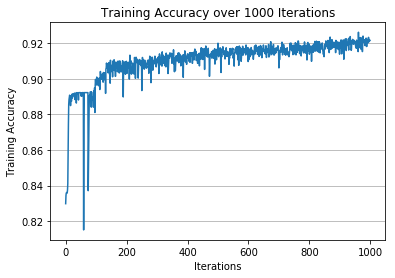

In [16]:
# accuracy should increase over epochs
plt.plot(history.history['acc'])
plt.title('Training Accuracy over 1000 Iterations')
plt.ylabel('Training Accuracy')
plt.xlabel('Iterations')
plt.grid(axis='y')

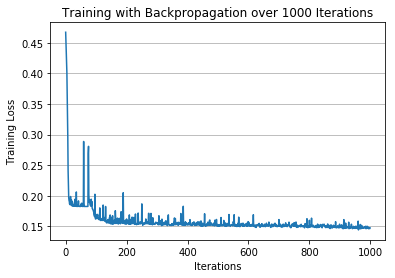

In [17]:
# loss is sum of error on training set
# error should decrease over epochs, steeper the better
plt.plot(history.history['loss'])
plt.title('Training with Backpropagation over 1000 Iterations')
plt.ylabel('Training Loss')
plt.xlabel('Iterations')
plt.grid(axis='y')

In [18]:
# accuracy after training
model_loss, model_accuracy = model.evaluate(
    X_test, y_test_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.17065693348441338, Accuracy: 0.9123711342254455


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
label_encoder = LabelEncoder()
label_encoder.fit(df['ANGINA'])

LabelEncoder()

In [21]:
encoded_predictions = model.predict_classes(X_test)
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

c:\Users\nssas\Anaconda3\envs\PythonData\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [22]:
test_df = pd.DataFrame({'predicted':prediction_labels,'actual':np.ravel(y_test)})
test_df.head()

,predicted,actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [23]:
corr = 0
wron = 0

for index, row in test_df.iterrows():
    if row['predicted'] == row['actual']:
        corr = corr + 1
    else:
        wron = wron + 1
        
print(f'Correct predictions: {corr}')
print(f'Incorrect predictions: {wron}')

Correct predictions: 2124
Incorrect predictions: 204
